In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, let's analyse the  dataframe.

In [2]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

Then, let's check the dataframe for missing values.

In [19]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points in all columns
missing_values_count[0:11]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
dtype: int64

The vast majority of values in the Cabin column are missing. It won't be useful. Let's drop it.

In [3]:
df.drop('Cabin',axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now, let's use plots to read the data that's useful for our purpose/goal.

C:\Users\davsi\AppData\Local\Temp\ipykernel_10076\3620589187.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Survived', data=df, palette='deep');


Survived
0    549
1    342
Name: count, dtype: int64


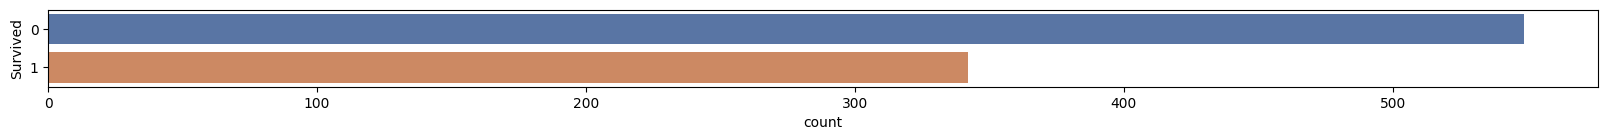

In [5]:
# How many passengers survived
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=df, palette='deep');
print(df.Survived.value_counts())

The plot above shows us that more people died than survived.

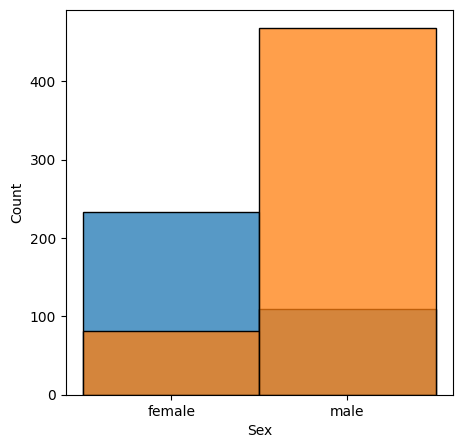

In [7]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(df.loc[df['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived = 1'});
sns.histplot(df.loc[df['Survived'] == 0]['Sex'], kde_kws={'label': 'Survived = 0'});

The histogram above highlights that women were much more likely to survive than men. Being the most important factor in determining survival.

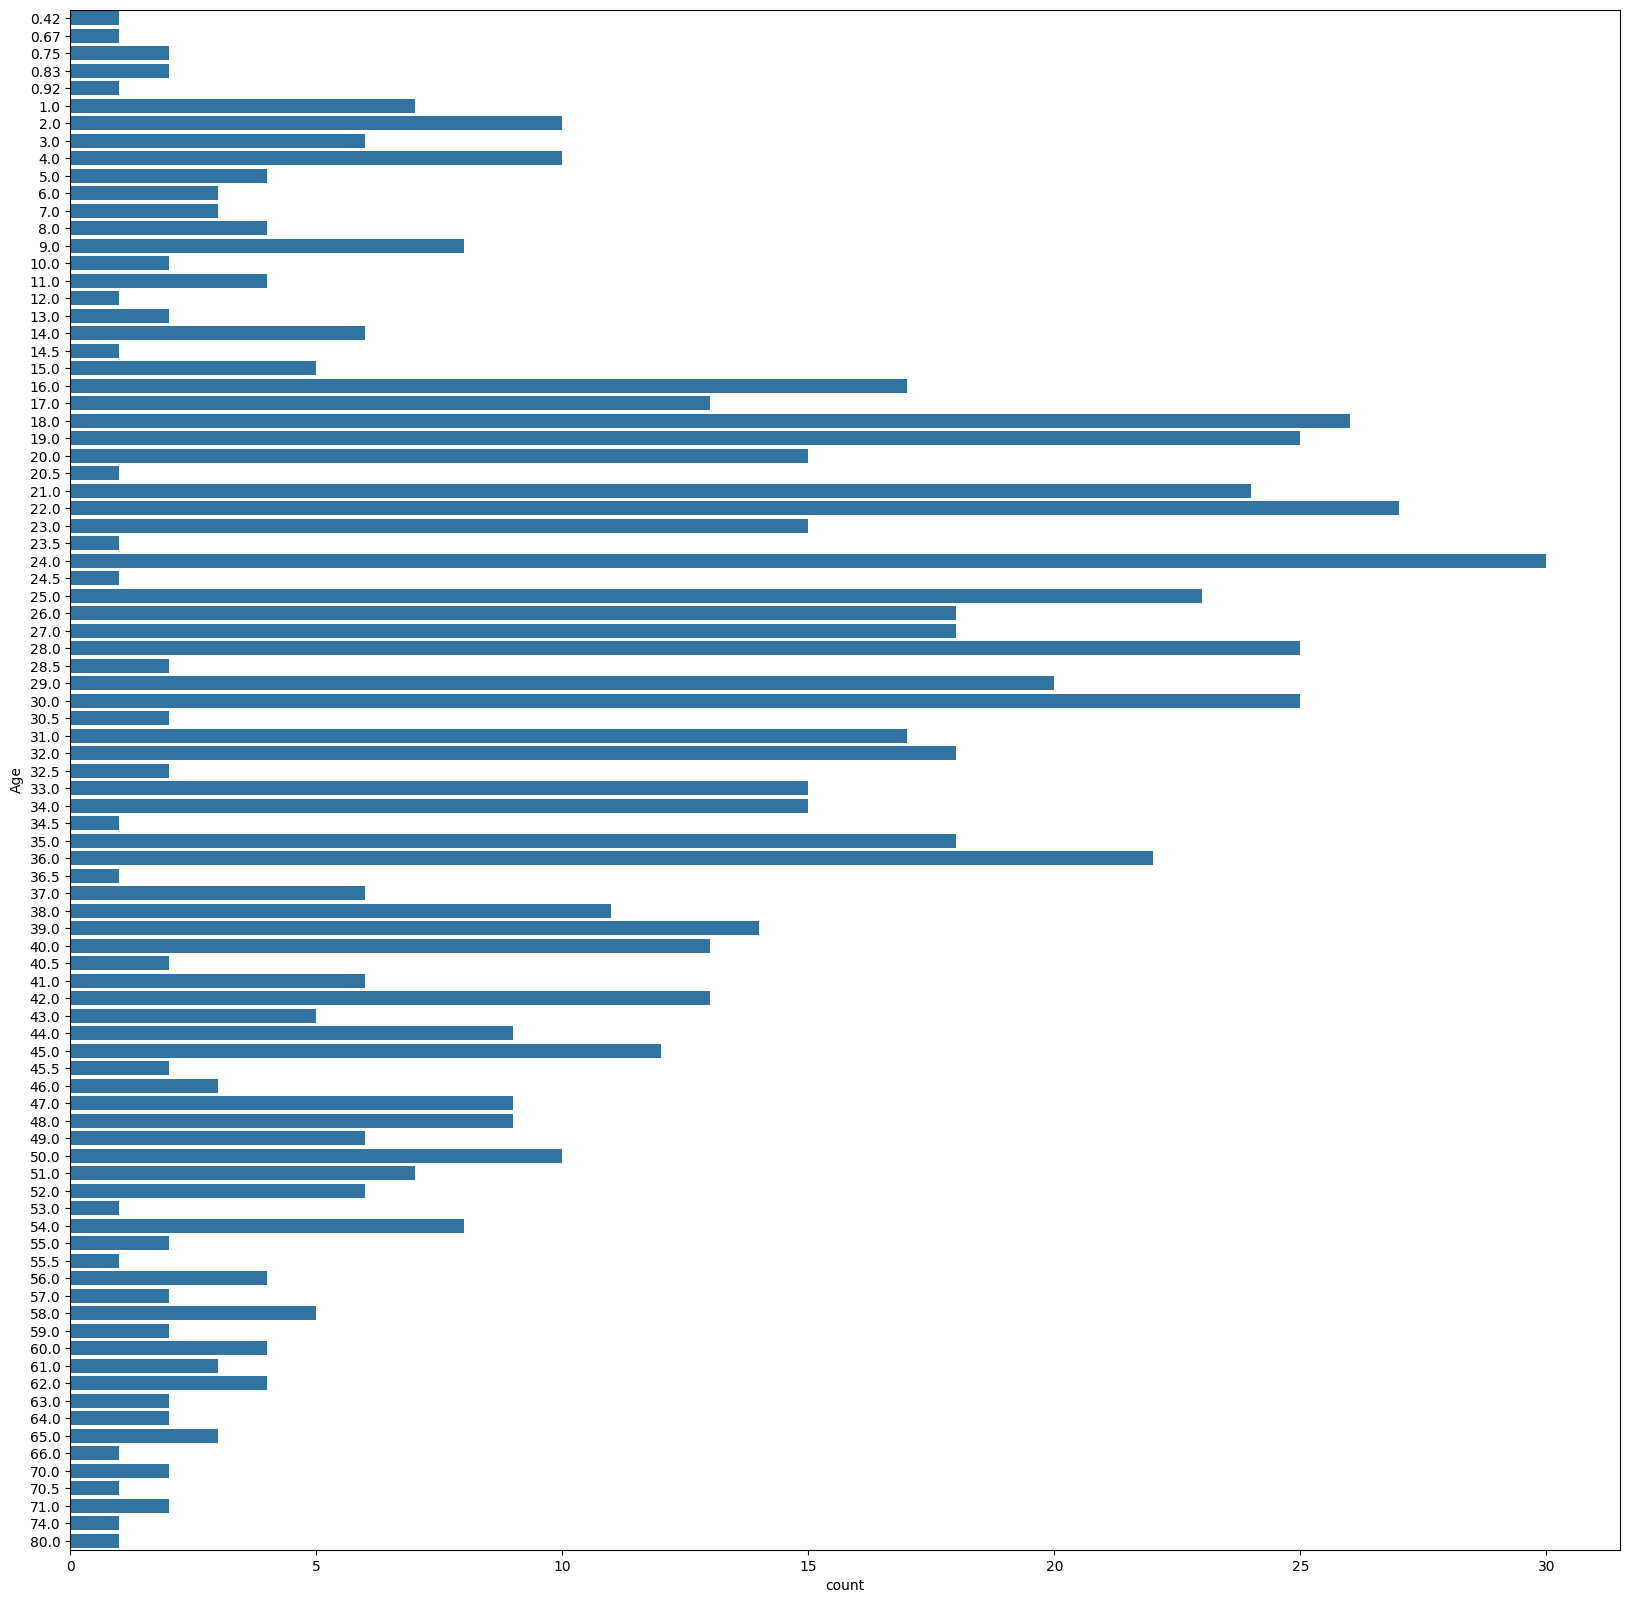

In [8]:
fig = plt.figure(figsize=(20,20))
sns.countplot(y=df['Age'], data=df);

The plot above allows us to see that the majority of the passengers were aged between 16 and 36 years old.

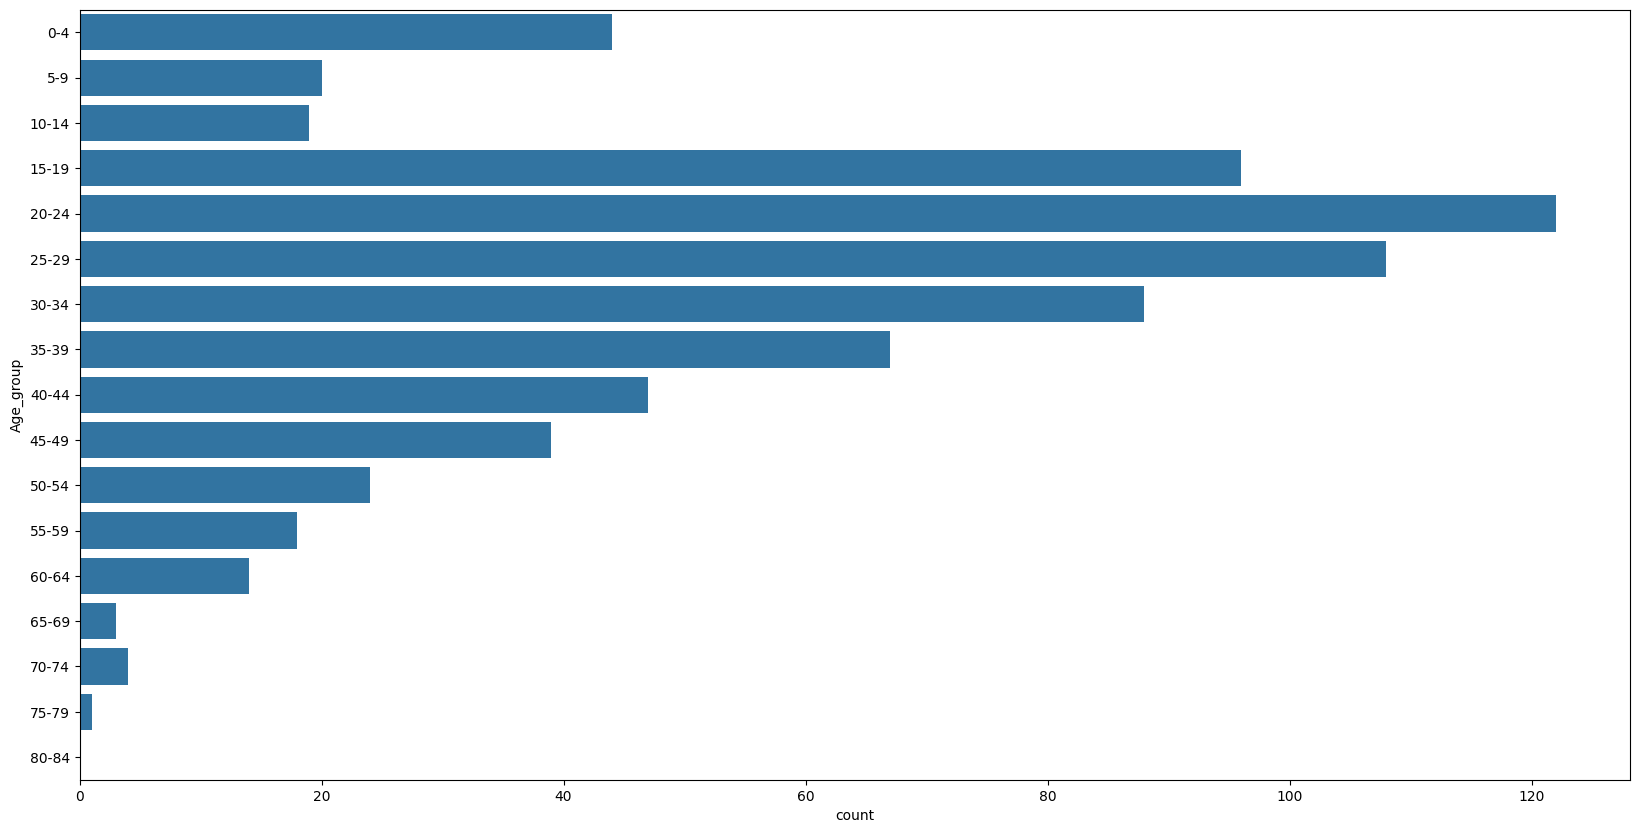

In [9]:
df['Age_group'] = pd.cut(df['Age'], [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85], 
                   labels=['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84'])

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df['Age_group'], data=df);

The plot above shows us the number of passengers by age group, reinforcing the previous analysis.

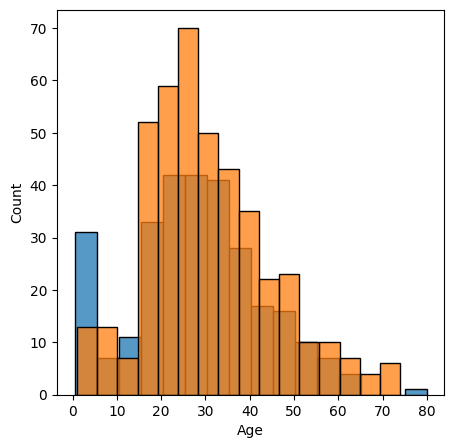

In [10]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(df.loc[df['Survived'] == 1]['Age'], kde_kws={'label': 'Survived = 1'});
sns.histplot(df.loc[df['Survived'] == 0]['Age'], kde_kws={'label': 'Survived = 0'});

This histogram above highlights the number of people who survived or not, by age group.
Apart from one exception at the later age range, children and teenagers up to 15 years old, were the only age group more likely to survive than not.
The data analysed corroborates the idea that this was a case of women and children first.

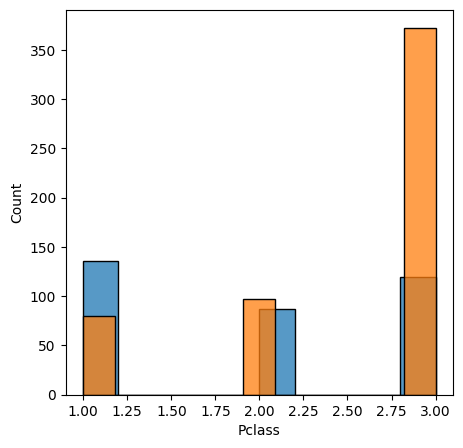

In [11]:
fig = plt.figure(figsize=(5, 5))
sns.histplot(df.loc[df['Survived'] == 1]['Pclass'], kde_kws={'label': 'Survived = 1'});
sns.histplot(df.loc[df['Survived'] == 0]['Pclass'], kde_kws={'label': 'Survived = 0'});

The histogram above corroborates the idea that upper class passenger were given preference on lifeboats. It also higlights that lower class passengers were disproportionately negatively affected.

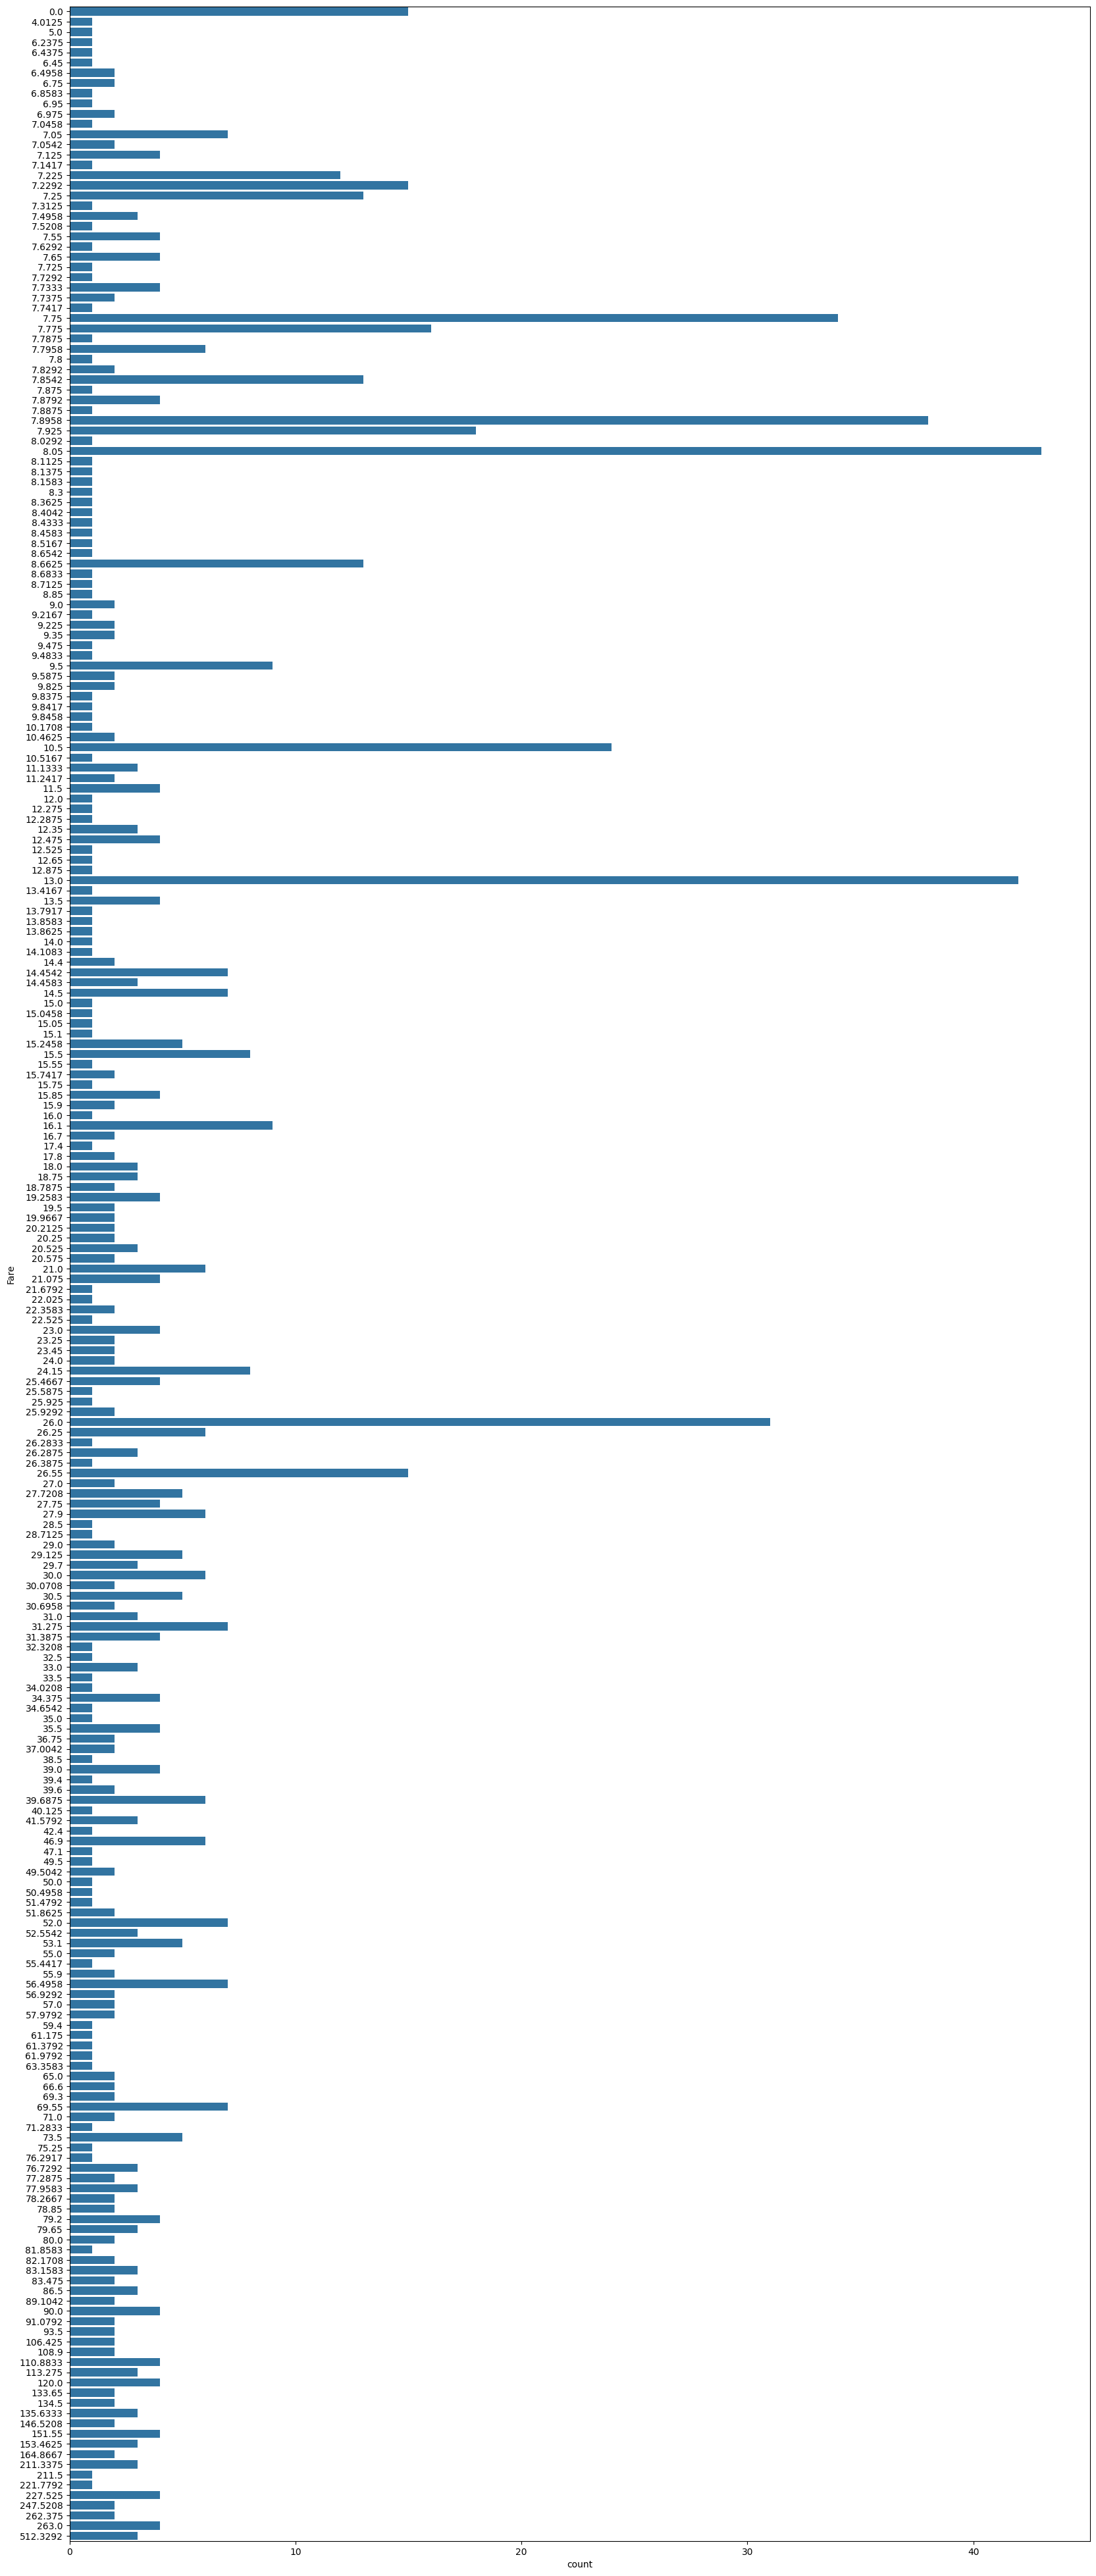

In [12]:
fig = plt.figure(figsize=(20,50))
sns.countplot(y=df['Fare'], data=df);

The plot above shows us that the majority of the fares charged were on the lower end of the spectrum.

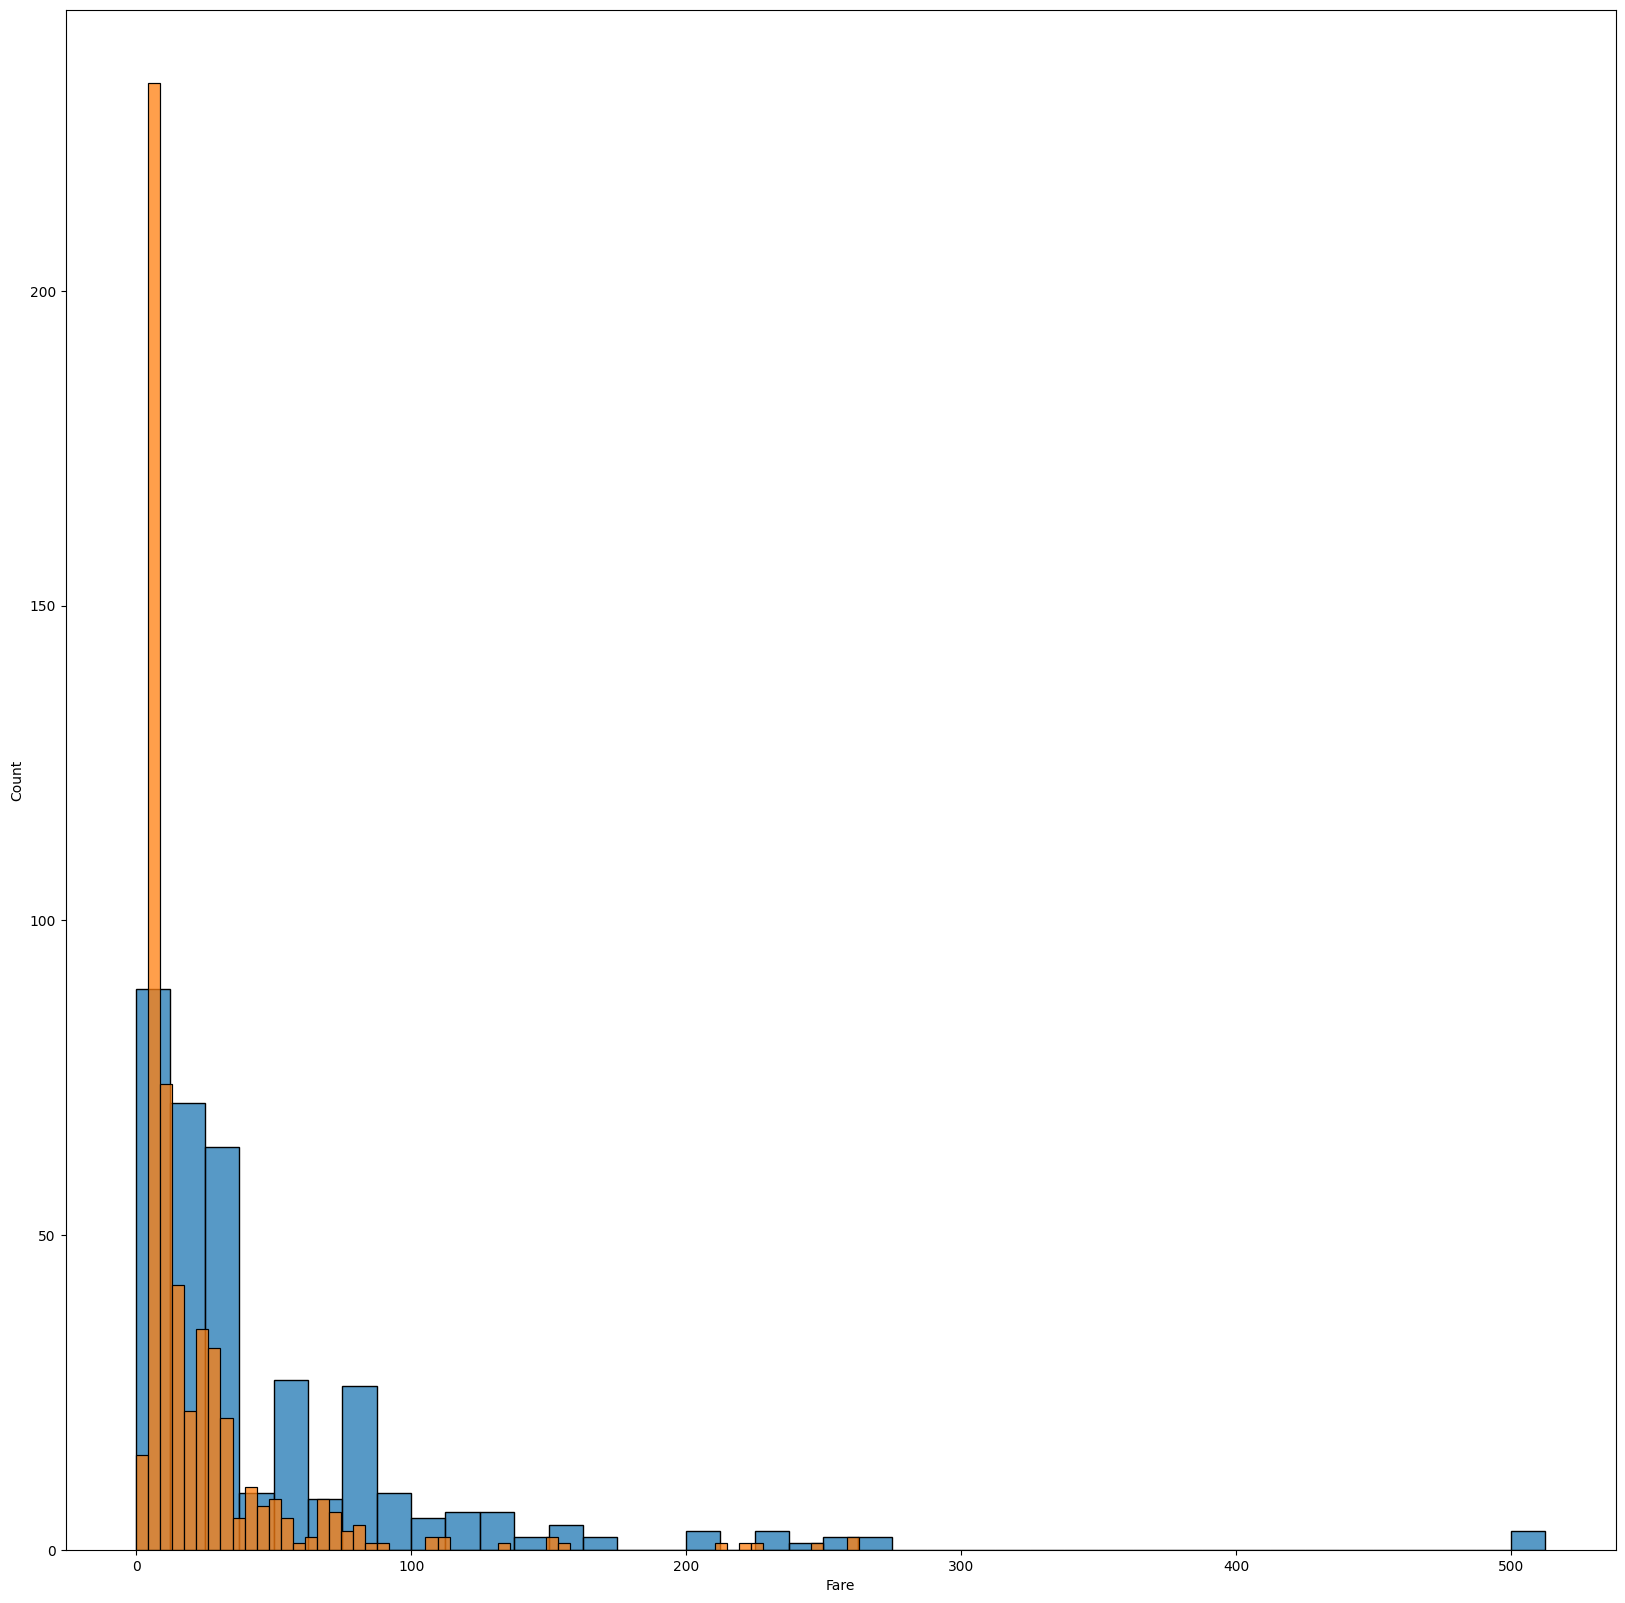

In [14]:
fig = plt.figure(figsize=(20, 20))
sns.histplot(df.loc[df['Survived'] == 1]['Fare'], kde_kws={'label': 'Survived = 1'});
sns.histplot(df.loc[df['Survived'] == 0]['Fare'], kde_kws={'label': 'Survived = 0'});

The plot above seems to show us that there a disproportionate negative survival rate at the very low end of the fares charge.